In [1]:
import glob
import os

import matplotlib.pyplot as plt
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd

%matplotlib widget

In [2]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 22
spinewidth = 2
fontsize = 26
legendsize = 13
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.2
markersize = 6

### Check cwd as the working directory

In [3]:
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/Manuscript/3D printed battery XPCS + HXN paper/DLS_20230623'
DLS_files = glob.glob(cwd + '/**_C.xls')
DLS_files.sort()
print(*[os.path.basename(i) for i in DLS_files], sep = '\n')

size distribution of Half_C.xls
size distribution of Ke_C.xls
size distribution of Second_C.xls


### Explaination of File names

##### More details could be found in Slides #13 or #14 in '20181029_rheology_summary_3D_printing_v1.2.pptx'

#### Half:     5-min 2000 rpm + 99-min 3500 rpm
#### Ke:       5-min 4000 rpm + 99-min 3500 rpm
#### Second:   99-min 3500 rpm

#### _A: particles after 1st centrifuge
#### _B: particles in effluent
#### _C: particles after all cnetrifuge and remixed by vortex

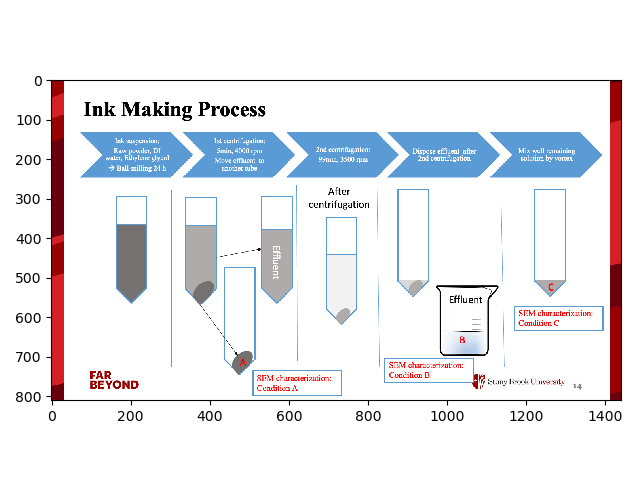

In [4]:
png = cwd + '/DLS_ABC_#14.png'
from skimage import io
img = io.imread(png)
io.imshow(png)

In [5]:
Ke_C = pd.read_excel(DLS_files[1], skiprows=1, index_col=None)
Sec_C = pd.read_excel(DLS_files[2], skiprows=1, index_col=None)

In [6]:
Ke_C

,r(nm),G(r),C(r),r(nm).1,G(r).1,C(r).1,r(nm).2,G(r).2,C(r).2
0,0.500000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,0.0
1,0.551472,0.0,0.0,0.551472,0.0,0.0,0.551472,0.0,0.0
2,0.608242,0.0,0.0,0.608242,0.0,0.0,0.608242,0.0,0.0
3,0.670856,0.0,0.0,0.670856,0.0,0.0,0.670856,0.0,0.0
4,0.739917,0.0,0.0,0.739917,0.0,0.0,0.739917,0.0,0.0
...,...,...,...,...,...,...,...,...,...
90,3378.759766,0.0,100.0,3378.759766,0.0,100.0,3378.759766,0.0,100.0
91,3726.580322,0.0,100.0,3726.580322,0.0,100.0,3726.580322,0.0,100.0
92,4110.206543,0.0,100.0,4110.206543,0.0,100.0,4110.206543,0.0,100.0
93,4533.324707,0.0,100.0,4533.324707,0.0,100.0,4533.324707,0.0,100.0


### Calculate the average of cumulative distribution C(r) and probability distribution G(r)

In [7]:
pd_list = [Ke_C, Sec_C]

C_key = ['C(r)', 'C(r).1', 'C(r).2', 'C(r)_mean']
G_key = ['G(r)', 'G(r).1', 'G(r).2', 'G(r)_mean']

dis_list = [C_key, G_key]

for i in range(len(pd_list)):
    for j in range(len(dis_list)):
        temp = pd.DataFrame()
        for k in range(len(dis_list[j])-1):
            temp[dis_list[j][k]] = pd_list[i][dis_list[j][k]]
        pd_list[i][dis_list[j][k+1]] = temp.mean(axis=1)


In [8]:
Ke_C

,r(nm),G(r),C(r),r(nm).1,G(r).1,C(r).1,r(nm).2,G(r).2,C(r).2,C(r)_mean,G(r)_mean
0,0.500000,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0
1,0.551472,0.0,0.0,0.551472,0.0,0.0,0.551472,0.0,0.0,0.0,0.0
2,0.608242,0.0,0.0,0.608242,0.0,0.0,0.608242,0.0,0.0,0.0,0.0
3,0.670856,0.0,0.0,0.670856,0.0,0.0,0.670856,0.0,0.0,0.0,0.0
4,0.739917,0.0,0.0,0.739917,0.0,0.0,0.739917,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90,3378.759766,0.0,100.0,3378.759766,0.0,100.0,3378.759766,0.0,100.0,100.0,0.0
91,3726.580322,0.0,100.0,3726.580322,0.0,100.0,3726.580322,0.0,100.0,100.0,0.0
92,4110.206543,0.0,100.0,4110.206543,0.0,100.0,4110.206543,0.0,100.0,100.0,0.0
93,4533.324707,0.0,100.0,4533.324707,0.0,100.0,4533.324707,0.0,100.0,100.0,0.0


### Plot cumulative particle size for each dataset

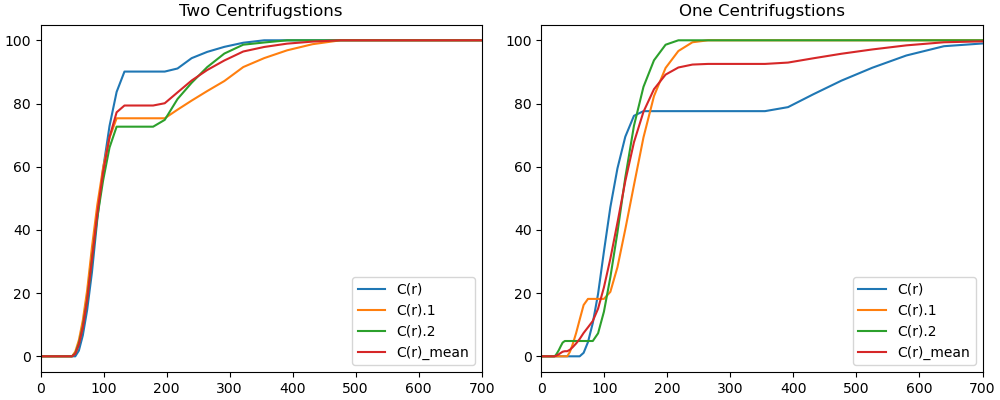

In [9]:
f1, ax1 = plt.subplots(1, 2, figsize = (10, 4), constrained_layout=True)
ax1 = ax1.flatten()

title_list = ['Two Centrifugstions', 'One Centrifugstions']

for i in range(len(ax1)):
    for j in range(len(C_key)):
        ax1[i].plot(pd_list[i]['r(nm)'], pd_list[i][C_key[j]], label=C_key[j])
        ax1[i].set_xlim(0, 700)
        ax1[i].set_title(title_list[i])
        ax1[i].legend()

### Plot cumulation and probabilty of particle size for two centrifgues vs. one centrifgue

Text(0, 0.5, 'Probability Distribution')

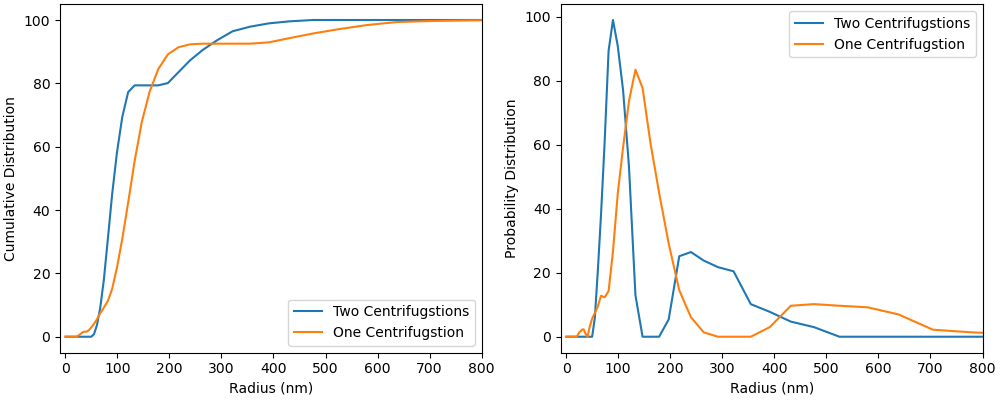

In [10]:
f2, ax2 = plt.subplots(1, 2, figsize = (10, 4), constrained_layout=True)
ax1 = ax1.flatten()

ax2[0].plot(Ke_C['r(nm)'], Ke_C['C(r)_mean'], label='Two Centrifugstions')
ax2[0].plot(Sec_C['r(nm)'], Sec_C['C(r)_mean'], label='One Centrifugstion')
ax2[0].set_xlim(-10, 800)
ax2[0].legend()
ax2[0].set_xlabel('Radius (nm)')
ax2[0].set_ylabel('Cumulative Distribution')

ax2[1].plot(Ke_C['r(nm)'], Ke_C['G(r)_mean'], label='Two Centrifugstions')
ax2[1].plot(Sec_C['r(nm)'], Sec_C['G(r)_mean'], label='One Centrifugstion')
ax2[1].set_xlim(-10, 800)
ax2[1].legend()
ax2[1].set_xlabel('Radius (nm)')
ax2[1].set_ylabel('Probability Distribution')

### Calculate global mean and standard deviation with probability
https://stackoverflow.com/questions/67545203/how-to-calculate-standard-deviation-in-python-when-x-and-px-are-known
https://www.rapidtables.com/calc/math/variance-calculator.html                           
https://stats.stackexchange.com/questions/210472/negative-variance-result-when-calculating-standard-deviation

In [11]:
def mean_std_pro(x, pro):
    x = np.asarray(x)
    pro = np.asarray(pro)
            
    ex = x * pro
    # ex2 = x**2 * pro
    mean = ex.sum() / pro.sum()
    # variance = ex2.sum() - ex.sum()**2
    var = (x-mean)**2 * pro
    
    if round(pro.sum()) == 1:
        variance = var.sum()
    else:
        variance = var.sum()/(pro.sum()-1)
        
    std_dev = variance**0.5

    return mean, std_dev

In [12]:
## Two centrifugations
mean, std = mean_std_pro(Ke_C['r(nm)'], Ke_C['G(r)_mean'])
print(f'For two centrifugations, average particle size is {mean: .2f} \u00B1{std: .2f} nm.')

For two centrifugations, average particle size is  133.08 ± 85.45 nm.


In [13]:
## One centrifugations
mean, std = mean_std_pro(Sec_C['r(nm)'], Sec_C['G(r)_mean'])
print(f'For two centrifugations, average particle size is {mean: .2f} \u00B1{std: .2f} nm.')

For two centrifugations, average particle size is  163.75 ± 121.01 nm.


In [14]:
pro = np.asarray([0.1, 0.1, 0.2, 0.2, 0.3, 0.1])
x = np.asarray([-2000, -1000, 0, 1000 ,2000 ,3000])
mean, std = mean_std_pro(x, pro)

In [15]:
std

1469.6938456699068